In [188]:
# from notebook.services.config import ConfigManager; ConfigManager().update('notebook', {"CodeCell": {"cm_config": {"autoCloseBrackets": False}}})
import warnings

warnings.filterwarnings("ignore")
import pandas as pd
from sklearn import datasets
import numpy as np
from scipy.linalg import svd

## 6.2 PCA Intro

### Data Load - California Housing Data Set

In [189]:
housing = datasets.fetch_california_housing()
X = pd.DataFrame(data=housing.data, columns=housing.feature_names)
X = X.head(500)
display(X)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
495,5.3794,52.0,6.861017,1.123729,1316.0,2.230508,37.86,-122.25
496,3.2619,52.0,4.792053,1.017219,1508.0,1.997351,37.85,-122.26
497,2.7054,52.0,5.001227,1.128834,1800.0,2.208589,37.85,-122.27
498,2.2431,47.0,6.371166,1.226994,719.0,2.205521,37.85,-122.27


<Axes: xlabel='HouseAge', ylabel='MedInc'>

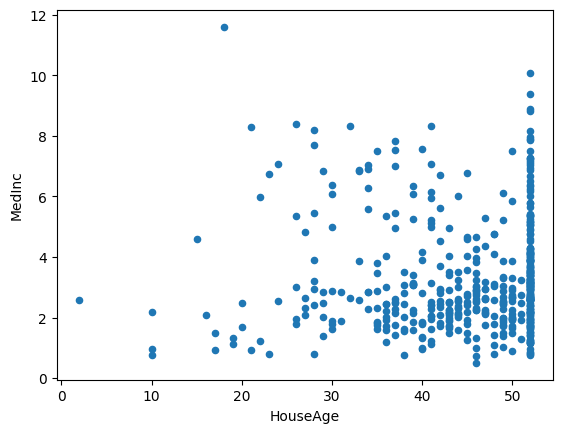

In [190]:
X.plot(kind="scatter", x="HouseAge", y="MedInc")

In [191]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000,500.000000
mean,3.263727,44.566000,4.986801,1.065597,962.554000,2.704029,37.8129,-122.232580
std,1.830058,9.115692,1.237588,0.101361,563.771908,0.886751,0.0450,0.044438
min,0.499900,2.000000,1.714286,0.571429,18.000000,1.437141,37.7300,-122.340000
25%,2.019875,40.000000,4.205968,1.011633,581.250000,2.223203,37.7800,-122.270000
50%,2.723100,48.000000,4.799381,1.060227,861.500000,2.559290,37.8100,-122.240000
75%,3.928600,52.000000,5.727549,1.104526,1178.500000,3.005099,37.8500,-122.190000
max,11.601700,52.000000,8.972868,1.753333,4985.000000,12.234043,37.9000,-122.120000


### PCA = normalize and SVD

#### Normalize (Center and Scale s.t. 0 mean, unit variance)

In [192]:
mu = X.mean()
sigma = X.std()
Xnorm = (X - mu) / sigma
Xnorm.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,-2.842171e-17,-3.055334e-16,-7.673862e-16,1.321609e-15,2.842171e-17,2.700062e-16,2.586376e-14,-3.900880e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.510241e+00,-4.669530e+00,-2.644270e+00,-4.875320e+00,-1.675419e+00,-1.428686e+00,-1.842204e+00,-2.417327e+00
25%,-6.796793e-01,-5.008945e-01,-6.309315e-01,-5.323970e-01,-6.763444e-01,-5.422343e-01,-7.311039e-01,-8.420812e-01
50%,-2.954155e-01,3.767130e-01,-1.514403e-01,-5.298101e-02,-1.792462e-01,-1.632240e-01,-6.444381e-02,-1.669760e-01
75%,3.633069e-01,8.155168e-01,5.985418e-01,3.840648e-01,3.830379e-01,3.395194e-01,8.244363e-01,9.581993e-01
max,4.556125e+00,8.155168e-01,3.220836e+00,6.785006e+00,7.134882e+00,1.074711e+01,1.935536e+00,2.533445e+00


#### Perform the SVD

In [193]:
(U, s, Vt) = svd(Xnorm, full_matrices=False)
V = Vt.T
Sigma = np.diag(s)

#### Reconstruction via SVD

In [194]:
# Verify reconstruction of X given SVD: X = U*Sigma*Vt
XnormFromSvd_mm = U @ Sigma @ Vt
XnormFromSvd = pd.DataFrame(
    data=XnormFromSvd_mm, columns=Xnorm.columns, index=Xnorm.index
)
# display(Xnorm)
# display(XnormFromSvd - Xnorm)
np.allclose(Xnorm, XnormFromSvd)

True

## 6.3 Interpreting the PCA

### Reconstruction via Summation Over Rank-1 Matrices

Helpful: https://www.cs.cmu.edu/~venkatg/teaching/CStheory-infoage/book-chapter-4.pdf

In [195]:
XnormFromSvd_prog_res = np.zeros_like(XnormFromSvd_mm)
r = len(s)  # --> rank of X
for i in range(r):
    ui = U[:, i].reshape(len(U), 1)  # all rows, ith col
    vi = Vt[i, :].reshape(1, r)  # ith row, all cols
    XnormFromSvd_prog_res += s[i] * (ui @ vi)

np.allclose(XnormFromSvd_mm, XnormFromSvd_prog_res)

True

## 6.4 PCA Analysis Continued

### Lower Dimension Projection

Xtilde_rr = Ur*Sigmar

where

Ur is first r columns U and Sigmar is upper rxr sub-matrix of Sigma

with * being matrix multiplication

In [196]:
r = 4
Xtilde_rr = pd.DataFrame(U[:, :r] @ Sigma[:r, :r])
display(Xtilde_rr)

,0,1,2,3
0,2.356638,2.561292,-0.373466,-0.081947
1,0.998427,1.926513,-3.621135,2.075675
2,2.292102,2.681337,0.752103,-0.340198
3,1.668287,0.851944,0.461972,-0.439094
4,1.575858,0.501728,0.748310,-0.144674
...,...,...,...,...
495,1.921808,0.934943,0.219431,0.555541
496,1.170219,-0.775287,-0.726074,-0.083996
497,1.019720,-1.136275,-0.107908,0.674712
498,1.253135,-0.284725,1.601242,1.145250


### Incorporate New Data

#### Make up a new row by average of 2 randomly selected rows

In [279]:
random_rows = X.sample(2, random_state=123)
new_row = random_rows.mean(axis=0).to_frame().transpose()
new_row_norm = (new_row - mu) / sigma

display(random_rows)
display(new_row)
display(new_row_norm)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
229,2.9844,50.0,5.260870,1.059783,462.0,2.510870,37.79,-122.19
337,2.2500,46.0,4.320225,1.028090,693.0,3.893258,37.74,-122.17


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.6172,48.0,4.790547,1.043936,577.5,3.202064,37.765,-122.18


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.353283,0.376713,-0.158578,-0.213698,-0.682996,0.56164,-1.064434,1.183234


#### Perform the Lower-Dimension Projection

In [278]:
new_row_norm_proj = new_row_norm @ V[:, :r]

display(new_row_norm_proj)

,0,1,2,3
0,-1.386209,0.591045,0.558818,-0.875751


#### Check the Process - Repeat on Existing Row to Verify Result

In [272]:
first_row_proj = ((X.head(1) - mu) / sigma) @ V[:, :r]
display(first_row_proj)
display(Xtilde_rr.head(1))

,0,1,2,3
0,2.356638,2.561292,-0.373466,-0.081947


,0,1,2,3
0,2.356638,2.561292,-0.373466,-0.081947
